# Sprint 機械学習スクラッチ 決定木

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
# 問題1〜4までのクラス

class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    
    
    
    
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]

        score = 0
        best_feature = 0
        threshold = 0

        for col in range(n_features):
            for idx in range(n_samples):
                value = X[idx, col]
                left_index = (X[:, col] <=value)
                left_node = y[left_index]
                right_node = y[~left_index]

                profit = self._info_profit(left_node, right_node)

                if profit > score:
                    score = profit
                    best_feature = col
                    threshold = X[idx, col]

        self.score = score
        self.best_feature = best_feature
        self.threshold = threshold
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("情報利得の最大値:{}".format(self.score))
            print("閾値:{}".format(self.threshold))

    # 問題3
    # 推定 
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        pred = np.where(X[:, self.best_feature] >= self.threshold, 1, 0)
        
        return pred
    
    # 問題1
    # ジニ不純度計算
    def _jini_impurity(self, array):
        """
        ジニ不純度計算関数
        ----------
        tree_class:枝分かれするクラスのndarray
        
        return
        
        """
        unique_num, counts = np.unique(array, return_counts=True)
        array_count = len(array)
        sigma = 0

        for i, j in enumerate(unique_num):
            sigma += (counts[i] / array_count)**2

        jini = 1 - sigma

        return jini

    # 問題2
    # 情報利得計算
    def _info_profit(self, left_node, right_node):
        """
        情報利得計算関数
        ----------
        tree_class:枝分かれするクラスのndarray
        
        return
        
        """
        # 親ノードを結合
        parent_node = np.concatenate([left_node, right_node])
        
        # 左右ノードのカウント
        counts_left, counts_right = len(left_node), len(right_node)
        counts_parent = counts_left + counts_right
        
        # 左右ノードのクラス数
        sample_left = counts_left / counts_parent
        sample_right = counts_right / counts_parent
        
        # 情報利得計算
        jini_parent = self._jini_impurity(parent_node)     # 親ノード
        jini_left = self._jini_impurity(left_node)               # レフトノード
        jini_right = self._jini_impurity(right_node)           # ライトノード
        
        profit = jini_parent - sample_left * jini_left - sample_right * jini_right
        
        return profit

class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        pass
        return

## 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード $t$ に対するジニ不純度 $I(t)$ は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。


I
(
t
)
=
1
−
K
∑
i
=
1
 
P
2
(
C
i
|
t
)
=
1
−
K
∑
i
=
1
 
(
N
t
,
i
N
t
,
a
l
l
)
2

$t$ : ノードのインデックス


$i$ : クラスのインデックス


$K$ : クラスの数


$C_i$ : i番目のクラス


$P(C_i|t)$ :　t番目のノードにおける$C_i$の割合


$N_{t,i}$ : t番目のノードのi番目のクラスに属するサンプル数


$N_{t,all}$ : t番目のノードのサンプルの総数


まずは簡単な例を作り、手計算と関数の結果を比較してください。


《例》


クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

## 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 $I(t)$ を計算する関数を呼び出して使います。情報利得$IG$は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。


I
G
(
p
)
=
I
(
p
)
−
N
l
e
f
t
,
a
l
l
N
p
,
a
l
l
I
(
l
e
f
t
)
−
N
r
i
g
h
t
,
a
l
l
N
p
,
a
l
l
I
(
r
i
g
h
t
)

$p$ : 親ノードを示すインデックス


$left$ : 左側のノードを示すインデックス


$right$ : 右側のノードを示すインデックス


まずは簡単な例を作り、手計算と関数の結果を比較してください。


《例》


左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143


## 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。


《組み合わせの取り方》


全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


《補足》


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 $I(p)$ は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。


## 問題1　個別実装

### 問題1
### ジニ不純度計算
def jini_impurity(array):
    """
    ### ジニ不純度計算関数
    ----------
    array:枝分かれするクラスのndarray

    return

    """
    if array.ndim == 1:
        pass
    else:
        array = array.ravel()
    
    unique_num, counts = np.unique(array, return_counts=True)
    array_count = len(array)
    sigma = 0
    
    for i, j in enumerate(unique_num):
        sigma += (counts[i] / array_count)**2

    jini = 1 - sigma
    
    return jini

### sample1
sample1 = np.array([np.ones(15), np.zeros(15)])
print("sample1のジニ不純度:{}".format(jini_impurity(sample1)))

### sample2
sample2 = np.array([np.ones(15)+1, np.ones(15), np.zeros(15)])
print("sample2のジニ不純度:{}".format(jini_impurity(sample2)))

### sample3
sample3 = np.concatenate([np.ones(18), np.zeros(12)])
print("sample3のジニ不純度:{}".format(jini_impurity(sample3)))

### sample4
sample4 = np.concatenate([np.ones(30), np.zeros(0)])
print("sample4のジニ不純度:{}".format(jini_impurity(sample4)))

## 問題2　個別実装

def _info_profit(left_node, right_node):
    """
    情報利得計算関数
    ----------
    tree_class:枝分かれするクラスのndarray

    return

    """
    # 親ノードを結合
    parent_node = np.concatenate([left_node, right_node])

    # 左右ノードのカウント
    counts_left, counts_right = len(left_node), len(right_node)
    counts_parent = counts_left + counts_right

    # 左右ノードのクラス数
    sample_left = counts_left / counts_parent
    sample_right = counts_right / counts_parent

    jini_parent = jini_impurity(parent_node)
    jini_left = jini_impurity(left_node)
    jini_right = jini_impurity(right_node)

    profit = jini_parent - sample_left * jini_left - sample_right * jini_right

    return profit

# sample
sample_left = np.concatenate([np.arange(30), np.arange(31, 41)])
sample_right = np.concatenate([np.linspace(1, 10, 20), np.random.random(5)])

_info_profit(sample_left, sample_right)

## 問題3　個別実装

def fit(X, y):
    """
    決定木分類器を学習する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    """
    n_samples = X.shape[0]
    n_features = X.shape[1]

    score = 0
    best_feature = 0
    threshold = 0

    for col in range(n_features):
        for idx in range(n_samples):
            value = X[idx, col]
            left_index = (X[:, col] <=value)
            left_node = y[left_index]
            right_node = y[~left_index]

            profit = _info_profit(left_node, right_node)

            if profit > score:
                score = profit
                best_feature = col
                threshold = X[idx, col]

    return score, best_feature, threshold

fit(X, y)

## 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。


## 問題4　個別実装
def predict(X):
    """
    決定木分類器を使いラベルを推定する
    """
    #以下はサンプルでfit関数で学習させた値を反映
    pred = np.where(X[:, 0] >= 1.9, 1, 0)

    return pred

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
#データのダウンロードとXとY変数に代入
iris = load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

df_Y = pd.DataFrame(iris.target)
df_Y.columns = ["Species"]

# データ結合 concat（axis=1）で列に配合
df_0 = pd.concat((df_X, df_Y), axis=1)
df_0["Species_name"] = iris.target_names[df_0["Species"]]

X = df_0.iloc[:100, [2, 3]].values
y = df_0.iloc[:100:, 4].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


In [4]:
# スクラッチ
scr_dt = ScratchDecesionTreeClassifierDepth1(verbose=False)

scr_dt.fit(X_train, y_train)
scr_dt_pred = scr_dt.predict(X_test)
scr_dt_result = [accuracy_score(y_test, scr_dt_pred), 
             precision_score(y_test, scr_dt_pred, average="micro"),
             recall_score(y_test, scr_dt_pred, average="micro"),
             f1_score(y_test, scr_dt_pred, average="micro")]

print("▼決定木")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(scr_dt_result[0], scr_dt_result[1], scr_dt_result[2], scr_dt_result[3]))

▼決定木
正答率(accuracy_score):0.96, 適合率(precision):0.96, 再現率(Recall):0.96, F値:0.96


In [5]:
# sklearn 決定木
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_result = [accuracy_score(y_test, dt_pred), 
             precision_score(y_test, dt_pred, average="micro"),
             recall_score(y_test, dt_pred, average="micro"),
             f1_score(y_test, dt_pred, average="micro")]

print("▼決定木")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt_result[0], dt_result[1], dt_result[2], dt_result[3]))

▼決定木
正答率(accuracy_score):1.00, 適合率(precision):1.00, 再現率(Recall):1.00, F値:1.00


## 【問題6】決定領域の可視化
決定領域を可視化してください。

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

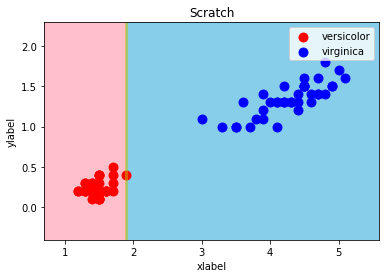

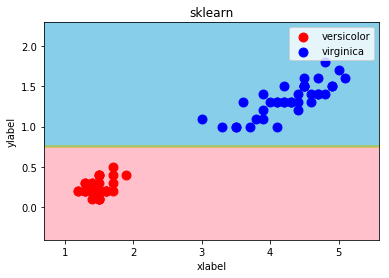

In [7]:
# 訓練データ
decision_region(X_train, y_train, scr_dt, title="Scratch")
decision_region(X_train, y_train, dt, title="sklearn")

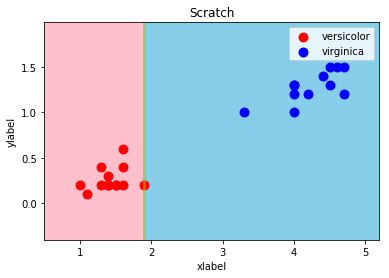

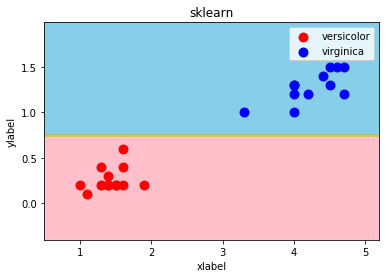

In [8]:
# テストデータ
decision_region(X_test, y_test, scr_dt, title="Scratch")
decision_region(X_test, y_test, dt, title="sklearn")

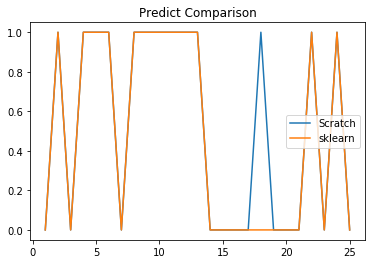

In [9]:
# predictの比較(分類結果のplot)
plt.subplot()

xline = np.arange(1, len(scr_dt_pred) + 1)

plt.title("Predict Comparison")
plt.plot(xline, scr_dt_pred, label="Scratch")
plt.plot(xline, dt_pred, label="sklearn")
plt.legend()

plt.show()

## 問題6まで完了

## 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成
深さが2の決定木分類器のクラスScratchDecesionTreeClassifierDepth2を作成してください。


深さ2とは空間の分割を2回行うことを指します。


《ヒント》


各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

